# 1. Problem statement

1. To what extent can structured Airbnb data support decision-making frameworks for tourism planning?
2. What analytical frameworks are most suitable for leveraging Airbnb Big Data in strategic tourism planning?
3. How can structured data from Airbnb listings inform the adaptation of prescriptive models for demand forecasting and host behavior analysis in tourism destinations?
4. Can forecasting models built on Airbnb data from one city be applied effectively to other cities for strategic tourism planning?

# 2. Data Collection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
df_1 = pd.read_csv("/Users/brigitte/Desktop/Tesis Maestria/Thesis pipeline OG/LONDON/listings.csv", encoding="utf-8")

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              96651 non-null  int64  
 1   name                            96651 non-null  object 
 2   host_id                         96651 non-null  int64  
 3   host_name                       96611 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   96651 non-null  object 
 6   latitude                        96651 non-null  float64
 7   longitude                       96651 non-null  float64
 8   room_type                       96651 non-null  object 
 9   price                           62684 non-null  float64
 10  minimum_nights                  96651 non-null  int64  
 11  number_of_reviews               96651 non-null  int64  
 12  last_review                     

In [9]:
df_2 = pd.read_csv("/Users/brigitte/Desktop/Tesis Maestria/Thesis pipeline OG/LONDON/listings 2.csv", encoding="utf-8")

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [11]:
df = df_1.merge(df_2, on="id", how="inner")

In [12]:
df.head()

id                                           name_x  host_id_x  \
0  264776                      Huge Four Bedroom Apartment    1389063   
1  264777                            One Bedroom Apartment    1389063   
2  264778          Two Bedroom Newly Refurbished Apartment    1389063   
3  264779                Refurbished Two Bedroom Apartment    1389063   
4  264780  Spacious refurbished 2 bedroom apt with balcony    1389063   

  host_name_x  neighbourhood_group neighbourhood_x  latitude_x  longitude_x  \
0         Sue                  NaN        Lewisham    51.44306     -0.01948   
1         Sue                  NaN        Lewisham    51.44284     -0.01997   
2         Sue                  NaN        Lewisham    51.44359     -0.02275   
3         Sue                  NaN        Lewisham    51.44355     -0.02309   
4         Sue                  NaN        Lewisham    51.44333     -0.02307   

       room_type_x  price_x  minimum_nights_x  number_of_reviews_x  \
0  Entire home/apt    297.0                 3                   68   
1  Entire home/apt     98.0                 3                   24   
2  Entire home/apt    148.0                 3                   58   
3  Entire home/apt    144.0                 3                   36   
4  Entire home/apt    157.0                 3                   54   

  last_review_x  reviews_per_month_x  calculated_host_listings_count_x  \
0    2025-05-28                 0.51                                11   
1    2024-12-11                 0.22                                11   
2    2025-05-01                 0.43                                11   
3    2025-04-10                 0.30                                11   
4    2024-12-29                 0.35                                11   

   availability_365_x  number_of_reviews_ltm_x  license_x  \
0                 293                       12        NaN   
1                 318                        4        NaN   
2                 302                        6        NaN   
3                 328                        7        NaN   
4                 255                        4        NaN   

                           listing_url       scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source                                           name_y  \
0  city scrape                      Huge Four Bedroom Apartment   
1  city scrape                            One Bedroom Apartment   
2  city scrape          Two Bedroom Newly Refurbished Apartment   
3  city scrape                Refurbished Two Bedroom Apartment   
4  city scrape  Spacious refurbished 2 bedroom apt with balcony   

                                         description  \
0  An extremely large and sunny four bedroom grou...   
1  Recently refurbished sunny one bedroom first f...   
2  A large and sunny two bedroom second floor apa...   
3  A large and sunny two bedroom second floor apa...   
4  Completely refurbished 2 bedroom apt to sleep ...   

                               neighborhood_overview  \
0  Catford is a well established London suburb. T...   
1                                                NaN   
2  Catford is a well established London suburb. T...   
3  Catford is a well established London suburb. T...   
4                                                NaN   

                                         picture_url  host_id_y  \
0  https://a0.muscache.com/pictures/hosting/Hosti...    1389063   
1  https://a0.muscache.com/pictures/hosting/Hosti...    1389063   
2  https://a0.muscache.com/pictures/50662093/af12...    1389063   
3  https://a0.muscache.com/pictures/50660860/e440...    1389063   
4  https://a0.muscach

# 3. Data Cleaning

In [14]:
#Dropping duplicate columns

cols = df.columns
cols_x = [c for c in cols if c.endswith("_x")]
cols_y = [c for c in cols if c.endswith("_y")]

df = df.drop(columns= cols_x)

rename_dict = {col: col.replace("_y", "") for col in cols_y}
df = df.rename(columns=rename_dict)

In [15]:
#Dropping columns that all values are null 

df_1 = df.dropna(axis=1, how="all")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96651 entries, 0 to 96650
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [16]:
df_1.head()

id                          listing_url       scrape_id last_scraped  \
0  264776  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  264777  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  264778  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  264779  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  264780  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source                                             name  \
0  city scrape                      Huge Four Bedroom Apartment   
1  city scrape                            One Bedroom Apartment   
2  city scrape          Two Bedroom Newly Refurbished Apartment   
3  city scrape                Refurbished Two Bedroom Apartment   
4  city scrape  Spacious refurbished 2 bedroom apt with balcony   

                                         description  \
0  An extremely large and sunny four bedroom grou...   
1  Recently refurbished sunny one bedroom first f...   
2  A large and sunny two bedroom second floor apa...   
3  A large and sunny two bedroom second floor apa...   
4  Completely refurbished 2 bedroom apt to sleep ...   

                               neighborhood_overview  \
0  Catford is a well established London suburb. T...   
1                                                NaN   
2  Catford is a well established London suburb. T...   
3  Catford is a well established London suburb. T...   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/hosting/Hosti...  1389063   
1  https://a0.muscache.com/pictures/hosting/Hosti...  1389063   
2  https://a0.muscache.com/pictures/50662093/af12...  1389063   
3  https://a0.muscache.com/pictures/50660860/e440...  1389063   
4  https://a0.muscache.com/pictures/airflow/Hosti...  1389063   

                                    host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
1  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
2  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
3  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
4  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   

    host_location                                         host_about  \
0  United Kingdom  I own the Glenthurston Apartments and have don...   
1  United Kingdom  I own the Glenthurston Apartments and have don...   
2  United Kingdom  I own the Glenthurston Apartments and have don...   
3  United Kingdom  I own the Glenthurston Apartments and have don...   
4  United Kingdom  I own the Glenthurston Apartments and have don...   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour                86%                 100%   
1     within an hour                86%                 100%   
2     within an hour                86%                 100%   
3     within an hour                86%                 100%   
4     within an hour                86%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/a0985...   
1                 f  https://a0.muscache.com/im/pictures/user/a0985...   
2                 f  https://a0.muscache.com/im/pictures/user/a0985...   
3                 f  https://a0.muscache.com/im/pictures/user/a0985...   
4                 f  https://a0.muscache.com/im/pictures/user/a0985...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
1  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
2  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
3  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
4  ht

In [17]:
#1st Checking missing values

missing_info = df_1.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_1)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                             Missing count  Missing %
neighborhood_overview                54668  56.562270
neighbourhood                        54667  56.561236
host_neighbourhood                   50360  52.104996
host_about                           47337  48.977248
beds                                 33975  35.152249
price                                33967  35.143972
estimated_revenue_l365d              33967  35.143972
bathrooms                            33921  35.096378
host_response_rate                   33024  34.168296
host_response_time                   33024  34.168296
host_acceptance_rate                 27615  28.571872
review_scores_location               25209  26.082503
review_scores_value                  25209  26.082503
review_scores_checkin                25208  26.081468
review_scores_communication          25185  26.057671
review_scores_accuracy               25179  26.051464
review_scores_cleanliness            25173  26.045256
review_scores_rating        

In [18]:
#Handling missing values: 1st section

#neighbourhood_overview and host_about features

df_1 = df_1.copy()
df_1["new_neighborhood_overview"] = df_1["neighborhood_overview"].notna().astype(int)
df_1["new_host_about"] = df_1["host_about"].notna().astype(int)

df_2 = df_1.drop(columns=["neighborhood_overview", "host_about"], axis=1)

#neighbourhood and host neighbourhood features

categorical_columns = [
    "neighbourhood", "host_neighbourhood",
]

for col in categorical_columns:
    df_2[col] = df_2[col].fillna("no information")

#price and beds features

df_3 = df_2.dropna(subset=["price", "beds"])

In [19]:
#2nd Checking missing values

missing_info = df_3.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_3)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                             Missing count  Missing %
host_location                        17366  27.750523
review_scores_checkin                14932  23.861040
review_scores_value                  14931  23.859442
review_scores_location               14931  23.859442
review_scores_communication          14930  23.857844
review_scores_cleanliness            14930  23.857844
review_scores_accuracy               14930  23.857844
reviews_per_month                    14928  23.854648
first_review                         14928  23.854648
review_scores_rating                 14928  23.854648
last_review                          14928  23.854648
host_response_time                    7610  12.160629
host_response_rate                    7610  12.160629
host_acceptance_rate                  5234   8.363828
description                           1698   2.713370
host_is_superhost                     1372   2.192429
has_availability                       849   1.356685
bedrooms                    

In [20]:
#Handling missing values: 2nd section

#host_location feature

df_3 = df_3.copy()

categorical_columns = [
    "host_location"
]

for col in categorical_columns:
     df_3[col] = df_3[col].fillna("no information")

# Reviews score features

review_score_columns = [   
    "review_scores_value", "review_scores_location", "review_scores_checkin", "review_scores_communication",
    "review_scores_accuracy", "review_scores_cleanliness", "review_scores_rating", "reviews_per_month", "review_scores_rating"    
]

for col in review_score_columns:
    df_3[col] = df_3[col].fillna(0.0)

# First review feature

df_4 = df_3.drop(columns=["first_review", "last_review"], axis=1)

In [21]:
#3rd Checking missing values

missing_info = df_4.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_4)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                           Missing count  Missing %
host_response_rate                  7610  12.160629
host_response_time                  7610  12.160629
host_acceptance_rate                5234   8.363828
description                         1698   2.713370
host_is_superhost                   1372   2.192429
has_availability                     849   1.356685
bedrooms                             115   0.183768
bathrooms_text                        92   0.147014
bathrooms                             80   0.127838
host_name                             28   0.044743
host_since                            26   0.041547
host_thumbnail_url                    26   0.041547
host_listings_count                   26   0.041547
host_total_listings_count             26   0.041547
host_has_profile_pic                  26   0.041547
host_identity_verified                26   0.041547
host_picture_url                      26   0.041547
picture_url                            7   0.011186


In [22]:
# Handling missing values: 3rd section

df_4 = df_4.copy()

# Host_response_rate and host_acceptance_rate features

percentage_columns = ["host_response_rate", "host_acceptance_rate"]

for col in percentage_columns:
    df_4[col] = df_4[col].fillna(0.0)

#host_response_time feature

categorical_columns = [
    "host_response_time"
]

for col in categorical_columns:
     df_4[col] = df_4[col].fillna("no information")

#description feature

df_4["new_description"] = df_4["description"].notna().astype(int)

df_5 = df_4.drop(columns=["description"], axis=1)

#host_is_superhost and has_availability features with true or false values (1 = True, 0 = False, 2 = No information)

df_5["host_is_superhost_label"] = df_5["host_is_superhost"].map({"t": 1, "f":0})
df_5["has_availability_label"] = df_5["has_availability"].map({"t": 1, "f":0})

df_5["host_is_superhost_label"] = df_5["host_is_superhost_label"].fillna("2")
df_5["has_availability_label"] = df_5[ "has_availability_label"].fillna("2")

#bedrooms, bathroom_text and bathrooms features
                                                                                                                             
df_6 = df_5.drop(columns=["bathrooms_text", "host_is_superhost", "has_availability"], axis=1)

bedrooms_columns = ["bedrooms", "bathrooms"]

for col in bedrooms_columns:
    df_6[col] = df_6[col].fillna(0.0)


In [23]:
#4th Checking missing values

missing_info = df_6.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_6)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                           Missing count  Missing %
host_name                             28   0.044743
host_since                            26   0.041547
host_thumbnail_url                    26   0.041547
host_picture_url                      26   0.041547
host_listings_count                   26   0.041547
host_total_listings_count             26   0.041547
host_has_profile_pic                  26   0.041547
host_identity_verified                26   0.041547
picture_url                            7   0.011186


In [24]:
# Handling missing values: 4th section

#host_name feature (unique identifier)

df_7 = df_6.drop(columns=["host_thumbnail_url", "host_picture_url", "picture_url"], axis=1)

#host_response_time feature

host_categorical_columns = ["host_name", "host_since", "host_has_profile_pic", "host_identity_verified"]

for col in host_categorical_columns:
     df_7[col] = df_7[col].fillna("no information")

#Host_listing_count features

host_numerical_columns = ["host_listings_count", "host_total_listings_count"]

for col in host_numerical_columns:
     df_7[col] = df_7[col].fillna("0.0")

In [25]:
#5th Checking missing values

missing_info = df_7.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_7)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

Empty DataFrame
Columns: [Missing count, Missing %]
Index: []


In [26]:
df_cleaned = df_7.copy()

# 4. Data Preprocessing

In [28]:
df_cleaned.head()

id                          listing_url       scrape_id last_scraped  \
0  264776  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  264777  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  264778  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  264779  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  264780  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source                                             name  host_id  \
0  city scrape                      Huge Four Bedroom Apartment  1389063   
1  city scrape                            One Bedroom Apartment  1389063   
2  city scrape          Two Bedroom Newly Refurbished Apartment  1389063   
3  city scrape                Refurbished Two Bedroom Apartment  1389063   
4  city scrape  Spacious refurbished 2 bedroom apt with balcony  1389063   

                                    host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
1  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
2  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
3  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
4  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   

    host_location host_response_time host_response_rate host_acceptance_rate  \
0  United Kingdom     within an hour                86%                 100%   
1  United Kingdom     within an hour                86%                 100%   
2  United Kingdom     within an hour                86%                 100%   
3  United Kingdom     within an hour                86%                 100%   
4  United Kingdom     within an hour                86%                 100%   

  host_neighbourhood host_listings_count host_total_listings_count  \
0         Bellingham                11.0                      12.0   
1         Bellingham                11.0                      12.0   
2         Bellingham                11.0                      12.0   
3         Bellingham                11.0                      12.0   
4         Bellingham                11.0                      12.0   

   host_verifications host_has_profile_pic host_identity_verified  \
0  ['email', 'phone']                    t                      t   
1  ['email', 'phone']                    t                      t   
2  ['email', 'phone']                    t                      t   
3  ['email', 'phone']                    t                      t   
4  ['email', 'phone']                    t                      t   

             neighbourhood neighbourhood_cleansed  latitude  longitude  \
0  Neighborhood highlights               Lewisham  51.44306   -0.01948   
1           no information               Lewisham  51.44284   -0.01997   
2  Neighborhood highlights               Lewisham  51.44359   -0.02275   
3  Neighborhood highlights               Lewisham  51.44355   -0.02309   
4           no information               Lewisham  51.44333   -0.02307   

        property_type        room_type  accommodates  bathrooms  bedrooms  \
0  Entire rental unit  Entire home/apt            10        2.0       4.0   
1  Entire rental unit  Entire home/apt             2        1.0       1.0   
2  Entire rental unit  Entire home/apt             4        1.0       2.0   
3  Entire rental unit  Entire home/apt             5        1.0       2.0   
4  Entire rental unit  Entire home/apt             4        2.0       2.0   

   beds                                          amenities    price  \
0   8.0  ["Cooking basics", "Washer", "Iron", "Smoke al...  $297.00   
1   2.0  ["Cooking basics", "Wine glasses", "Iron", "Sm...   $98.00   
2   3.0  ["Cooking basics", "Iron", "Smoke alarm", "Fir...  $148.00   
3   5.0  ["Cooking basics", "Iron", "Smoke alarm", "Fir...  $144.00   
4   4.0  ["Cooking basics", "Washer", "Iron", "Smoke al...  $157.00   

  

In [29]:
# 1st Feature engineering section 

#dropping features with unique identifiers and non relevant information

df_8 = df_cleaned.drop(columns=["id", "listing_url", "scrape_id", "source", "name", "host_id", "host_url", "host_name", "neighbourhood",
                               "last_scraped", "calendar_last_scraped"])

#host_since: extracting the amount of time that a host is in the platform

df_8["host_since"] = pd.to_datetime(df_8["host_since"], errors="coerce")
df_8["host_tenure_days"] = (datetime.now() - df_8["host_since"]).dt.days

#host_location: as the information is disperse it will be extracted if the host is from UK (Airbnb location) or not 
# 1 = Host is in UK; 0 = Host is not in the UK; -1 = Host location info is missing 

df_8["host_is_local"] = df_8["host_location"].apply(
    lambda x: 1 if isinstance(x,str) and "United Kingdom" in x else(0 if isinstance(x,str) else -1)
)

df_9 = df_8.drop(columns=["host_location", "host_since"])

In [30]:
# 2nd Feature engineering section

#Price feature - creating price per guest

df_9["price"] = df_9["price"].replace("[\$,]", "", regex=True).astype(float)

df_9["price_per_guest"] = df_9.apply(
    lambda row: round(row["price"] / row["accommodates"], 2) if row ["accommodates"] 
    and row["accommodates"]> 0 else round(row['price'], 2), axis=1
)

#Minimum_nights - creating bins to categorize 

def categorize_min_nights(n):
    if n<= 3:
        return "short_stay"
    elif n<=14:
        return "mid_stay"
    else:
        return "long_stay"
    
df_9["min_nights_category"] = df_9["minimum_nights"].apply(categorize_min_nights)

#dropping engineered features:

df_10 = df_9.drop(columns=["minimum_nights"])

In [31]:
# 3rd Feature engineering section

#Amenities, creating a column whether if the Airbnb listing have or do not have amenities and how many 

import ast

df_10["amenities_list"] = df_10["amenities"].apply(ast.literal_eval)

df_10["amenities_count"] = df_10["amenities_list"].apply(len)
    
#Maximum_nights, adjusting all the nights to maximum a year

max_night_cap = 365

df_10["maximum_nights_capped"] = df_10["maximum_nights"].apply(lambda x: min(x, max_night_cap))
    
#dropping features non needed

df_11 = df_10.drop(columns=["amenities", "amenities_list", "maximum_nights"])

In [32]:
# 4th Feature engineering section

#in this section some columns that contain redundant information will be dropped

df_12 = df_11.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                                  "maximum_maximum_nights", "availability_60", "availability_90"])

In [33]:
# 5th Feature engineering section

#Creating bins for feature: reviews per month

bins = [0, 1, 5, 10, df_12["reviews_per_month"].max()]
labels = ["0-1", "2-5", "6-10", "11+"]

df_12["reviews_per_month_bins"] = pd.cut(df_12["reviews_per_month"], bins=bins, labels=labels, include_lowest=True)

In [34]:
df_12.head()

host_response_time host_response_rate host_acceptance_rate  \
0     within an hour                86%                 100%   
1     within an hour                86%                 100%   
2     within an hour                86%                 100%   
3     within an hour                86%                 100%   
4     within an hour                86%                 100%   

  host_neighbourhood host_listings_count host_total_listings_count  \
0         Bellingham                11.0                      12.0   
1         Bellingham                11.0                      12.0   
2         Bellingham                11.0                      12.0   
3         Bellingham                11.0                      12.0   
4         Bellingham                11.0                      12.0   

   host_verifications host_has_profile_pic host_identity_verified  \
0  ['email', 'phone']                    t                      t   
1  ['email', 'phone']                    t                      t   
2  ['email', 'phone']                    t                      t   
3  ['email', 'phone']                    t                      t   
4  ['email', 'phone']                    t                      t   

  neighbourhood_cleansed  latitude  longitude       property_type  \
0               Lewisham  51.44306   -0.01948  Entire rental unit   
1               Lewisham  51.44284   -0.01997  Entire rental unit   
2               Lewisham  51.44359   -0.02275  Entire rental unit   
3               Lewisham  51.44355   -0.02309  Entire rental unit   
4               Lewisham  51.44333   -0.02307  Entire rental unit   

         room_type  accommodates  bathrooms  bedrooms  beds  price  \
0  Entire home/apt            10        2.0       4.0   8.0  297.0   
1  Entire home/apt             2        1.0       1.0   2.0   98.0   
2  Entire home/apt             4        1.0       2.0   3.0  148.0   
3  Entire home/apt             5        1.0       2.0   5.0  144.0   
4  Entire home/apt             4        2.0       2.0   4.0  157.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
0                     3.0                  1125.0               13   
1                     3.0                  1125.0                0   
2                     3.0                  1125.0                3   
3                     3.0                  1125.0               11   
4                     3.0                  1125.0                0   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               293                 68                     12   
1               318                 24                      4   
2               302                 58                      6   
3               328                 36                      7   
4               255                 54                      4   

   number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  \
0                       1               134                    15   
1                       0               157                     7   
2                       0               141                     8   
3                       0               167                     7   
4                       0               101                     7   

   estimated_occupancy_l365d  estimated_revenue_l365d  review_scores_rating  \
0                        110                  32670.0                  4.68   
1                         37                   3626.0                  4.58   
2                         55                   8140.0                  4.50   
3                         64                   9216.0                  4.64   
4                         37                   5809.0                  4.68   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.65                       4.72                   4.84   
1                    4.42                       4.54                   4.58   
2     

In [35]:
df_final = df_12.copy()

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62579 entries, 0 to 96650
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   host_response_time                            62579 non-null  object  
 1   host_response_rate                            62579 non-null  object  
 2   host_acceptance_rate                          62579 non-null  object  
 3   host_neighbourhood                            62579 non-null  object  
 4   host_listings_count                           62579 non-null  object  
 5   host_total_listings_count                     62579 non-null  object  
 6   host_verifications                            62579 non-null  object  
 7   host_has_profile_pic                          62579 non-null  object  
 8   host_identity_verified                        62579 non-null  object  
 9   neighbourhood_cleansed                        6257

# 5. Data Visualization

# b. Property Features

In [39]:
import plotly.express as px

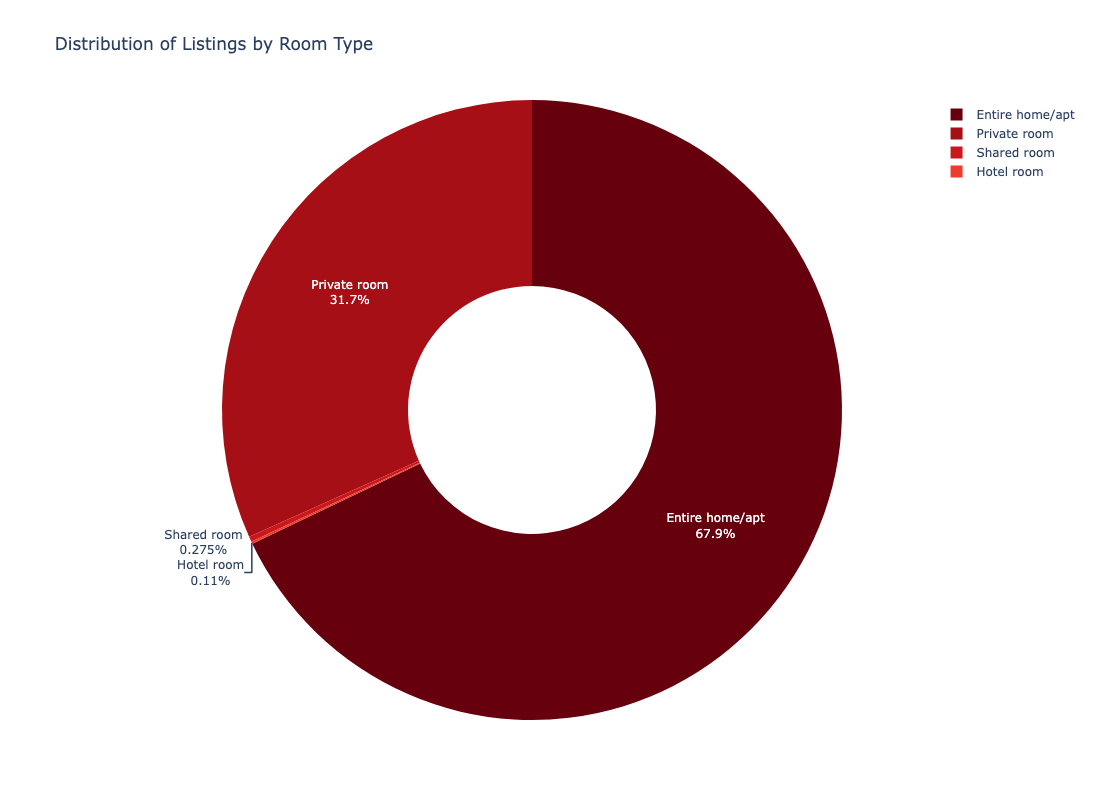

In [40]:
fig = px.pie(
    df_final,
    names="room_type",
    title="Distribution of Listings by Room Type",
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.Reds[::-1]
)

fig.update_traces(textinfo="percent+label", sort=True)
fig.update_layout(width=800, height=800)
fig.show()

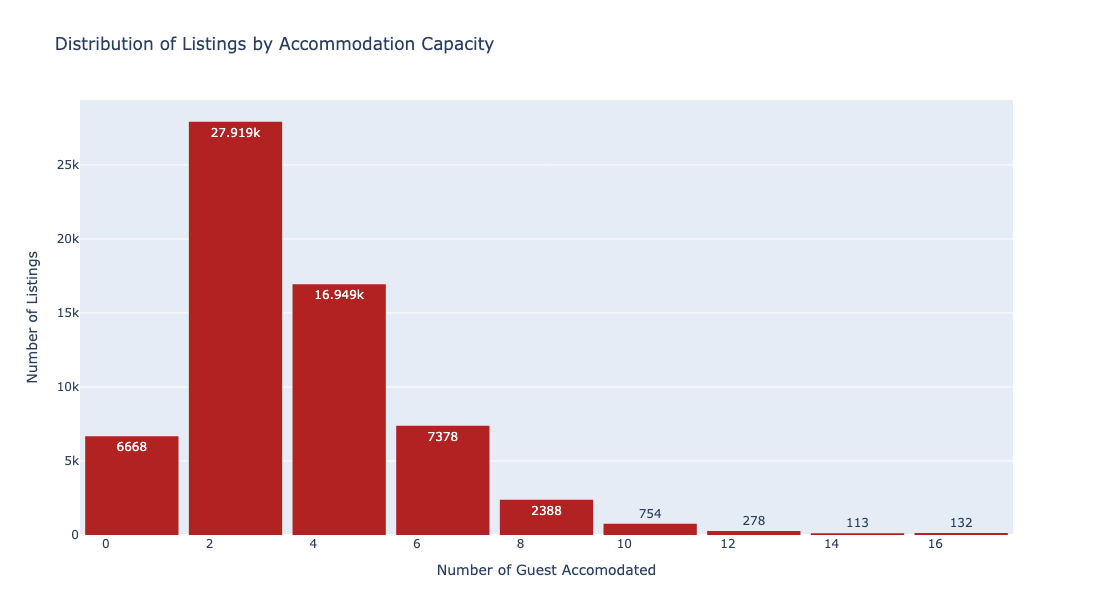

In [41]:
fig = px.histogram(
    df_final,
    x="accommodates",
    nbins=15,
    title="Distribution of Listings by Accommodation Capacity",
    color_discrete_sequence=["#B22222"],
    text_auto=True
)

fig.update_layout(
    xaxis_title="Number of Guest Accomodated",
    yaxis_title="Number of Listings",
    width=1100,
    height=600,
    bargap=0.1
)

fig.show()

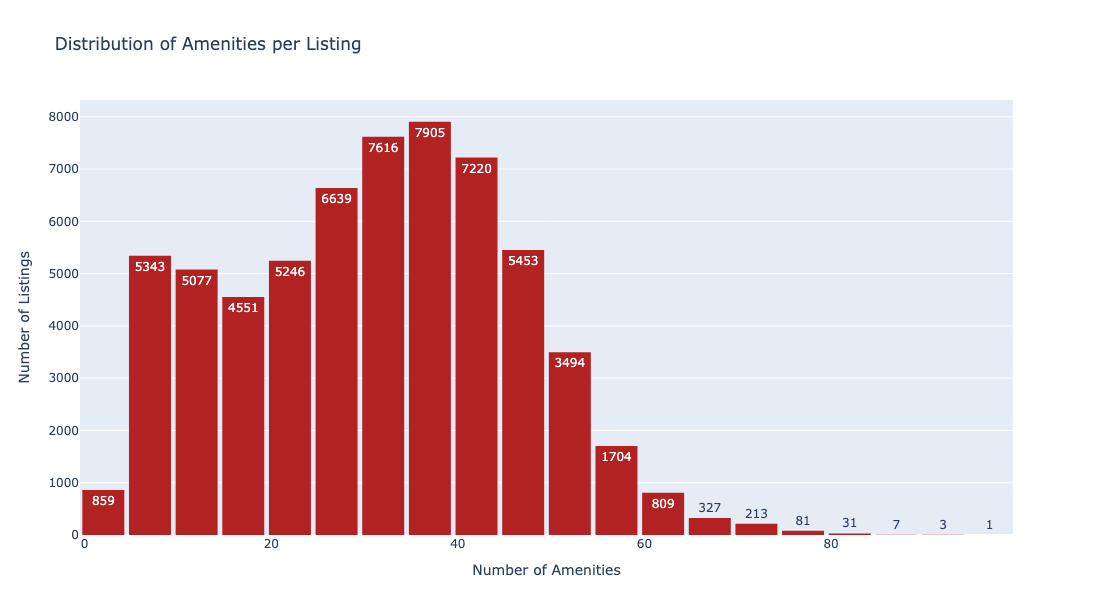

In [114]:
fig = px.histogram(
    df_final,
    x="amenities_count",
    nbins=30,
    title="Distribution of Amenities per Listing",
    color_discrete_sequence=["#B22222"],
    text_auto=True
)

fig.update_layout(
    xaxis_title="Number of Amenities",
    yaxis_title="Number of Listings",
    width=1100,
    height=600,
    bargap=0.1
)

fig.show()

In [43]:
df_map = df_final.groupby('neighbourhood_cleansed').agg({
    'latitude':'mean',
    'longitude':'mean',
    'price_per_guest':'median',
    'accommodates':'mean'
}).reset_index()

/var/folders/7h/nsblcjzx4bd16cs81ljv6v5h0000gn/T/ipykernel_5645/1926537074.py:11: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



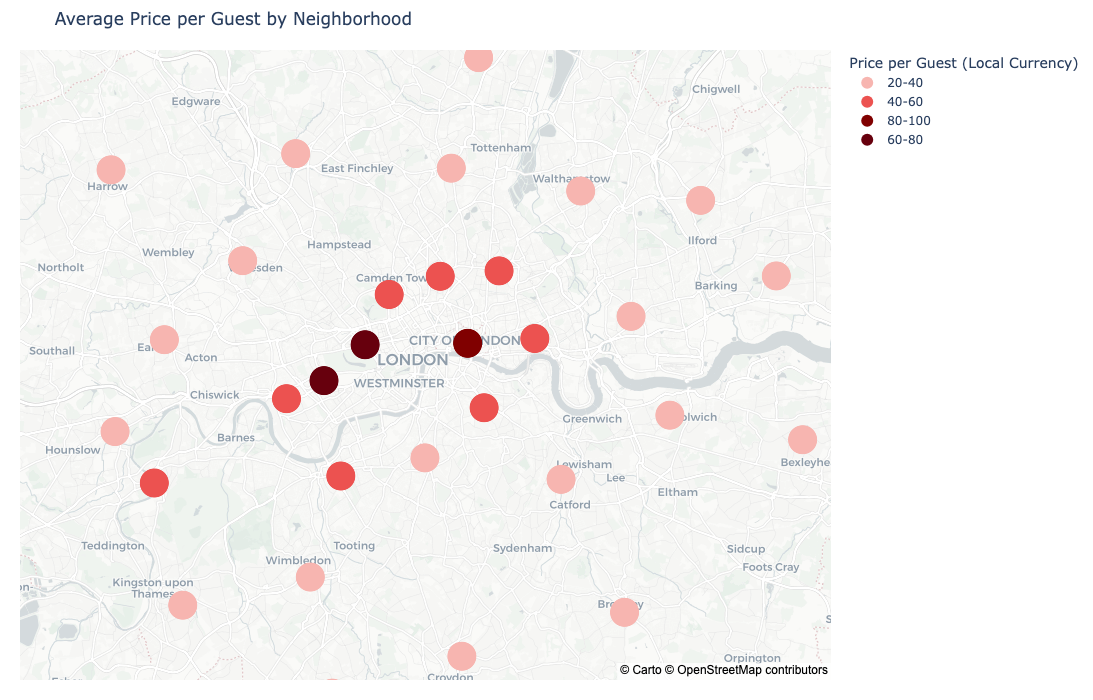

In [120]:
max_price = df_map['price_per_guest'].max()
bins = [0, 20, 40, 60, 80, 100, max(max_price, 101)]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100+']
df_map['price_bin'] = pd.cut(df_map['price_per_guest'], bins=bins, labels=labels, include_lowest=True)

color_palette = ['#f7b5b0', '#ec5250', '#800000', '#67000d', '#4d0000', '#1a0000']

df_map['size_scaled'] = df_map['price_per_guest'] / df_map['price_per_guest'].max() * 80  # max 80 instead of 50

# Scatter mapbox
fig = px.scatter_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    size="size_scaled",
    color="price_bin",
    color_discrete_sequence=color_palette,
    hover_name="neighbourhood_cleansed",
    hover_data={"price_per_guest": True, "latitude": False, "longitude": False},
    zoom=10,
    mapbox_style="carto-positron",
    title="Average Price per Guest by Neighborhood"
)

fig.update_traces(marker=dict(size=30))  

fig.update_layout(
    width=1050,
    height=700,
    legend_title_text='Price per Guest (Local Currency)',
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()

In [45]:
#listings per neighborhood

df_neigh = df_final.groupby('neighbourhood_cleansed').agg({
    'latitude':'mean',
    'longitude':'mean',
    'accommodates':'mean',        
    'price_per_guest':'median', 
    'property_type':'count'   
}).rename(columns={'property_type':'num_listings'}).reset_index()

In [48]:
coords_scaled = df_final[['latitude','longitude']].to_numpy()

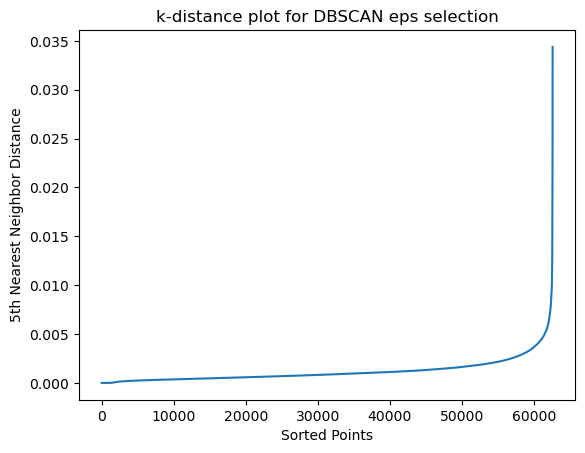

In [122]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(coords_scaled)
distances, indices = neighbors_fit.kneighbors(coords_scaled)
distances = np.sort(distances[:,4])  # 4th index = n_neighbors-1
plt.plot(distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Sorted Points")
plt.title("k-distance plot for DBSCAN eps selection")
plt.show()


In [58]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.005, min_samples=9)  
df_final['cluster'] = db.fit_predict(coords_scaled)

In [60]:
df_final['cluster'].value_counts()

 0      57195
-1       1503
 4        384
 7        335
 1        213
        ...  
 92         7
 77         7
 81         7
 101        6
 83         5
Name: cluster, Length: 104, dtype: int64

In [62]:
cluster_sizes = df_final['cluster'].value_counts()
large_clusters = cluster_sizes[cluster_sizes >= 100].index  # threshold

df_final['cluster_filtered'] = df_final['cluster'].apply(lambda x: x if x in large_clusters else -1)


In [64]:
cluster_map = {old:new for new, old in enumerate(sorted(df_final['cluster_filtered'].unique()))}
df_final['cluster_final'] = df_final['cluster_filtered'].map(cluster_map)

In [66]:
df_final['cluster_final'].value_counts()

1     57195
0      3628
4       384
5       335
2       213
3       177
6       120
10      111
9       109
11      106
8       101
7       100
Name: cluster_final, dtype: int64

In [ ]:
df_final['cluster_final_str'] = df_final['cluster_final'].astype(str)

red_colors = [
    '#D32F2F',  # red
    '#F57C00',  # orange
    '#1976D2',  # blue
    '#388E3C',  # green
    '#FBC02D',  # yellow
    '#512DA8',  # purple
    '#0097A7',  # teal
    '#00BCD4',  # turquoise
    '#0288D1',  # light blue
    '#C2185B',  # pink
    '#FFA000'
]
fig = px.scatter_mapbox(
    df_final,
    lat="latitude",
    lon="longitude",
    color="cluster_final_str",
    color_discrete_sequence=red_colors,
    size="accommodates",
    size_max=30,
    hover_name="

In [ ]:
neighbourhood_cleansed

/var/folders/7h/nsblcjzx4bd16cs81ljv6v5h0000gn/T/ipykernel_5645/3660632884.py:16: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



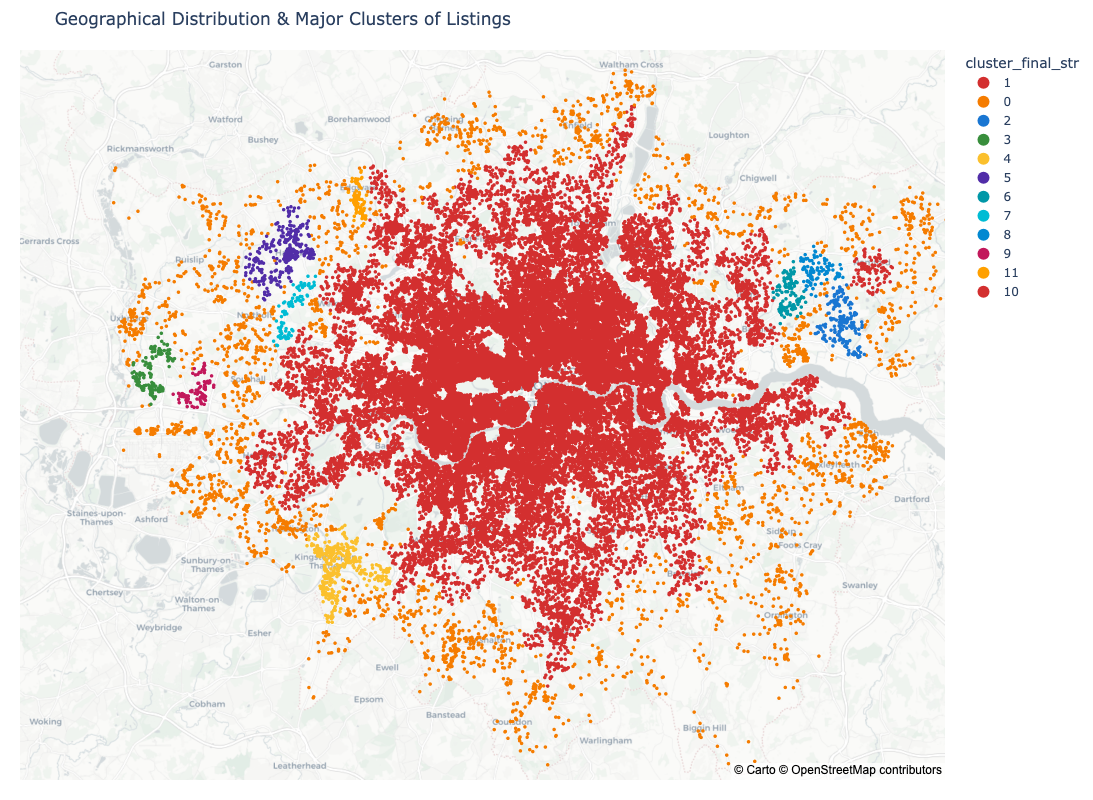

In [ ]:
",
    hover_data={"price_per_guest": True, "accommodates": True},
    zoom=10,
    mapbox_style="carto-positron",
    title="Geographical Distribution & Major Clusters of Listings",
)

fig.update_traces(marker=dict(size=4))  

fig.update_layout(
    width=1050,
    height=800,
    margin=dict(l=20, r=20, t=50, b=20),
)

fig.show()